<a href="https://colab.research.google.com/github/AI-Ki-Pathshala/AI-ML-tutorials/blob/main/Recording_Notebooks/Regression/1_Linear_Regression_Hindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install numpy pandas matplotlib
%pip install scikit-learn

---------------------------------------
PART 1:  - Pure Math – रोज़मर्रा की ज़िंदगी का उदाहरण (Real Life Example) -
---------------------------------------

मान लीजिए आप एक चाय की दुकान चला रहे हैं ☕
आपने ये बातें नोट कीं:

| घंटा | कमाई |
|--------|-------|
| 0      | ₹0    |
| 1      | ₹50   |
| 2      | ₹100  |
| 3      | ₹150  |
| 4      | ?     |


Manual Solve (Bina Formula)

**अंतर निकालिए:**
- 100 − 50 = 50  
- 150 − 100 = 50  

**Observation:**  
हर घंटे कमाई ₹50 बढ़ रही है।

**Calculation:**  
150 + 50 = **200**

**Answer:**  
4 ghante ki kamai = **₹200**

---------------------------------------
अब इसी पैटर्न को फ़ॉर्मूला में बदलते हैं
---------------------------------------

| घंटा (x) | कमाई (y) | Rate of Change (m) | Starting Point (c) |
|------------|-----------|-------------------|--------------------|
| 0          | 0         | 50                | 0                  |
| 1          | 50        | 50                | 0                  |
| 2          | 100       | 50                | 0                  |
| 3          | 150       | 50                | 0                  |
| 4          | ?         | 50                | 0                  |

**मतलब - Meaning:**
- m = 50 (हर घंटे की कमाई)
- c = 0 (0 घंटे पर कमाई 0)

**(फ़ॉर्मूला समझ में आया) - Formula discover hui -:**  
y = mx + c  
y = 50x + 0

**(अनुमान) - Prediction :**  
y = 50 × 4 = **200**

---------------------------------------
PART 2: Create Graph From Math - (Using Python Libraries)
---------------------------------------


In [ ]:
import matplotlib.pyplot as plt

# Time (hours)
x = [1, 2, 3, 4]

# Money earned
y = [50, 100, 150, 200]

plt.scatter(x, y)
plt.plot(x, y)
plt.xlabel("Time (hours)")
plt.ylabel("Money (₹)")
plt.title("Time vs Money")
plt.show()


---------------------------------------
PART 3: Pure Python Logic (NO AI / ML)
---------------------------------------


In [14]:
# Past data: time in hours
time = [1, 2, 3, 4]

# Past data: money earned at each hour
money = [50, 100, 150, 200]

# Empty list to store how much money increases per hour
increase_per_hour = []

# Loop starts from index 1 because we compare with previous hour
for i in range(1, len(time)):

    # Calculate money change between current hour and previous hour
    change = money[i] - money[i-1]

    # Store the change (increase) in the list
    increase_per_hour.append(change)

# Calculate average increase per hour
average_increase = sum(increase_per_hour) / len(increase_per_hour)

# Future time (hour) for which we want prediction
future_time = 5

# Predict future money using average increase
predicted_money = average_increase * future_time

# Print the predicted money value
print(predicted_money)


250.0


---------------------------------------
PART 4: AI + MACHINE LEARNING CODING
---------------------------------------

In [15]:
# Import Linear Regression model from sklearn library
from sklearn.linear_model import LinearRegression

# Training data (input)
# X represents time (hours)
# Double brackets are used because ML models expect 2D data
X = [[1], [2], [3], [4]]

# Training data (output)
# y represents money earned at each hour
y = [50, 100, 150, 200]

# Create a Linear Regression model object
model = LinearRegression()

# Train the model using input (X) and output (y)
# Model learns the relationship between time and money
model.fit(X, y)

# Predict money for future time = 5 hours
# Again using double brackets to keep input 2D
print(model.predict([[5]]))


[250.]


------------------------
BAD - Real life meaning:
------------------------
Gaadi accelerate kar rahi hai (speed har second zyada tez badh rahi hai).

| Time (seconds) | Speed (km/h) |
|----------------|-------------|
| 1              | 2           |
| 2              | 8           |
| 3              | 18          |
| 4              | 32          |
| 5              | 50          |
| 6              | 72          |


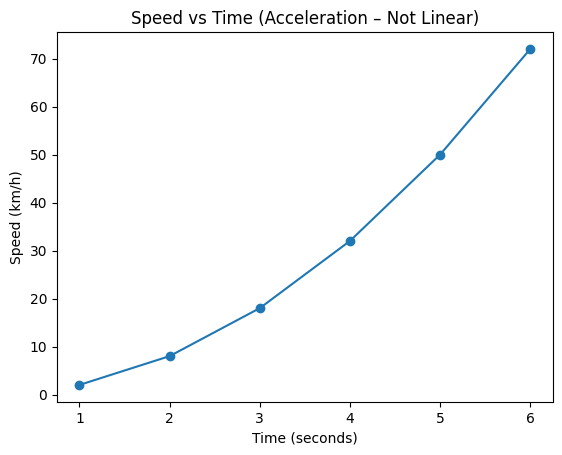

In [16]:
# Import matplotlib library for drawing graphs
import matplotlib.pyplot as plt

# Time values (in seconds)
time = [1, 2, 3, 4, 5, 6]

# Speed values corresponding to each time
speed = [2, 8, 18, 32, 50, 72]

# Draw dots to show actual data points
plt.scatter(time, speed)

# Draw a line connecting the points
plt.plot(time, speed)

# Label for X-axis (time)
plt.xlabel("Time (seconds)")

# Label for Y-axis (speed)
plt.ylabel("Speed (km/h)")

# Title of the graph
plt.title("Speed vs Time (Acceleration – Not Linear)")

# Display the graph on screen
plt.show()


Crop Production (फसलों का उत्पादन): क्यों Linear Regression यहाँ काम नहीं करती?

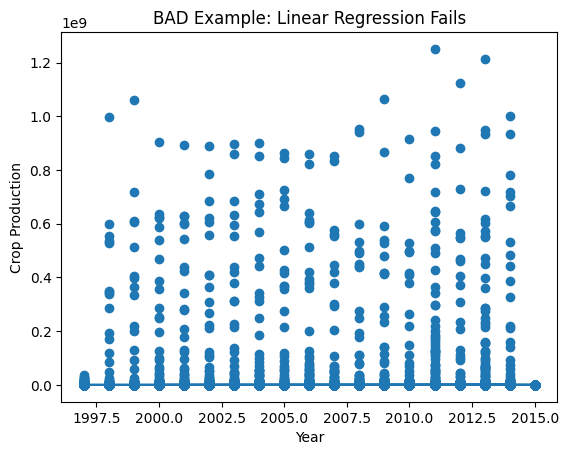

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset (download CSV from Kaggle first)
file_path = r'Data/Crop_Production_Bad_Example.csv'
df = pd.read_csv(file_path)
# Columns example: Crop_Year, Production
df = df.dropna()
X = df[['Crop_Year']]
y = df['Production']

# Train model
model = LinearRegression()
model.fit(X, y)

# Prediction
y_pred = model.predict(X)

# Plot
plt.figure()
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.xlabel("Year")
plt.ylabel("Crop Production")
plt.title("BAD Example: Linear Regression Fails")
plt.show()


NaN count before cleaning:
living area    0
Price          0
dtype: int64


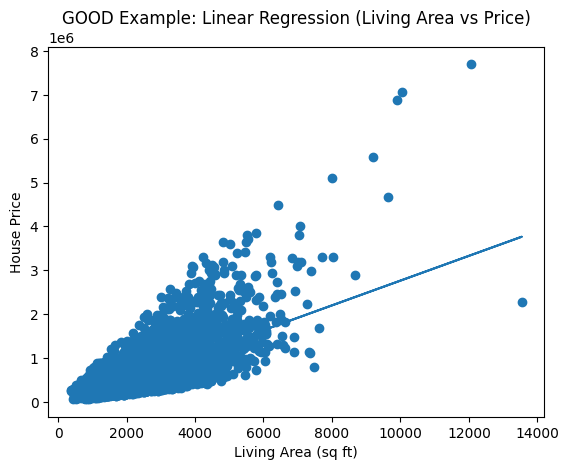

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset (download CSV from Kaggle first)
file_path = r'Data/House_Price_India_Good_Example.csv'
df = pd.read_csv(file_path)

# Clean column names (VERY IMPORTANT)
df.columns = df.columns.str.strip()

# Check NaN values
print("NaN count before cleaning:")
print(df[['living area', 'Price']].isna().sum())

# Remove NaN rows
df = df[['living area', 'Price']].dropna()

# Define X and y
X = df[['living area']]   # Independent variable
y = df['Price']           # Dependent variable

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot
plt.figure()
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.xlabel("Living Area (sq ft)")
plt.ylabel("House Price")
plt.title("GOOD Example: Linear Regression (Living Area vs Price)")
plt.show()


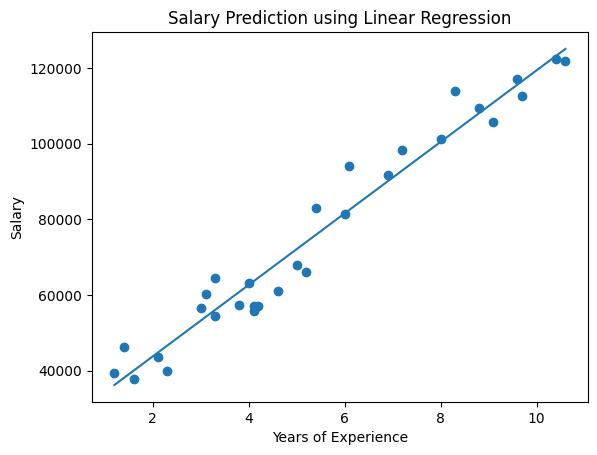

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset (download CSV from Kaggle first)
file_path = r'Data/Salary_dataset_Good_Example.csv'
df = pd.read_csv(file_path)

# Step 2: Define X (input) and y (output)
X = df[["YearsExperience"]]   # must be 2D
y = df["Salary"]

# Step 3: Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 4: Predict salaries
# Uses trained model to predict salary.
# Stores predictions in a new column:
# PredictedSalary
df["PredictedSalary"] = model.predict(X)

# # Step 5: Print predictions
# print(df)

# Step 6: Plot
# Draws dots for actual data points.
# Shows real salary values.
plt.scatter(df["YearsExperience"], df["Salary"])
# Draws a straight line for predicted values.
# This is the regression line.
plt.plot(df["YearsExperience"], df["PredictedSalary"])
# Label for X-axis.
plt.xlabel("Years of Experience")
# Label for Y-axis.
plt.ylabel("Salary")
# Sets the graph title.
plt.title("Salary Prediction using Linear Regression")
# Displays the graph on screen.
plt.show()

# Predicts salary for 3.5 years experience.
# Output is an estimated salary.
# print(model.predict([[3.5]]))